In [1]:
import glob
import imageio
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.segmentation import find_boundaries

from deepcell.applications import Mesmer
from deepcell.utils.plot_utils import create_rgb_image

from dataset import PolarisPublicationData

In [2]:
def plot_gene(df, gene, color, alpha=1, size=13):
    df_gene = df.loc[df.predicted_name == gene]
    plt.scatter(df_gene.y, df_gene.x, color=color, alpha=alpha, s=size)

In [3]:
data = PolarisPublicationData()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of e5292488985fd49505ca2c615bc52864 so we will re-download the data.
283238400/283229571 [==============================] - 22s 0us/step


In [4]:
results, segmentation = data.load_data(figure='2')
segmentation.shape

(2048, 2048)

In [5]:
results.head()

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,10,11,12,13,14,15,16,17,18,19
0,1130,563,0,NaN,0.999987,261918,11,Jaml,prediction,0.946265,...,0.000049,0.000055,0.000121,0.003296,0.000371,0.000073,1.000000,0.000091,0.007760,0.000036
1,415,369,0,NaN,0.997816,60117,46,Net1,prediction,1.000000,...,0.003210,0.000618,0.000364,0.000057,0.032782,0.000009,0.000151,0.000090,0.000267,0.019942
2,415,368,0,NaN,0.999988,60116,46,Net1,prediction,1.000000,...,0.003986,0.000778,0.000250,0.000059,0.325777,0.000007,0.000145,0.000081,0.000206,0.145562
3,1716,637,0,NaN,1.000000,359921,46,Net1,prediction,1.000000,...,0.000434,0.000513,0.000068,0.000056,0.979891,0.000090,0.001963,0.000202,0.000173,0.977774
4,964,453,0,NaN,0.978650,206890,91,Cd27,prediction,1.000000,...,0.000061,0.120955,0.722722,0.000557,0.000061,0.000108,0.989966,0.000219,0.000219,0.971796


In [6]:
cell_bounds = find_boundaries(segmentation)

colors = {
    'Slc51a': 'lightblue',
    'Ada': 'black',
    'Apob': 'mediumblue',
    'Slc5a1': 'dodgerblue',
    'Txndc5': 'orange',
    'Klk1': 'darkmagenta',
    'Krt7': 'darkmagenta',
    'C1qb': 'darkgreen',
    'H2-Eb1': 'darkgreen',
    'Ighd': 'yellowgreen',
    'Mzb1': 'yellowgreen',
    'Cd79a': 'yellowgreen',
    'Cd79b': 'yellowgreen',
    'Cd4': 'limegreen',
    'Cd8a': 'limegreen',
    'Mki67': 'coral',
    'Stmn1': 'coral',
    'Acta2': 'hotpink',
    'Nes': 'red',
    'Adgrf5': 'red',
    'Scarb1': 'red'
}

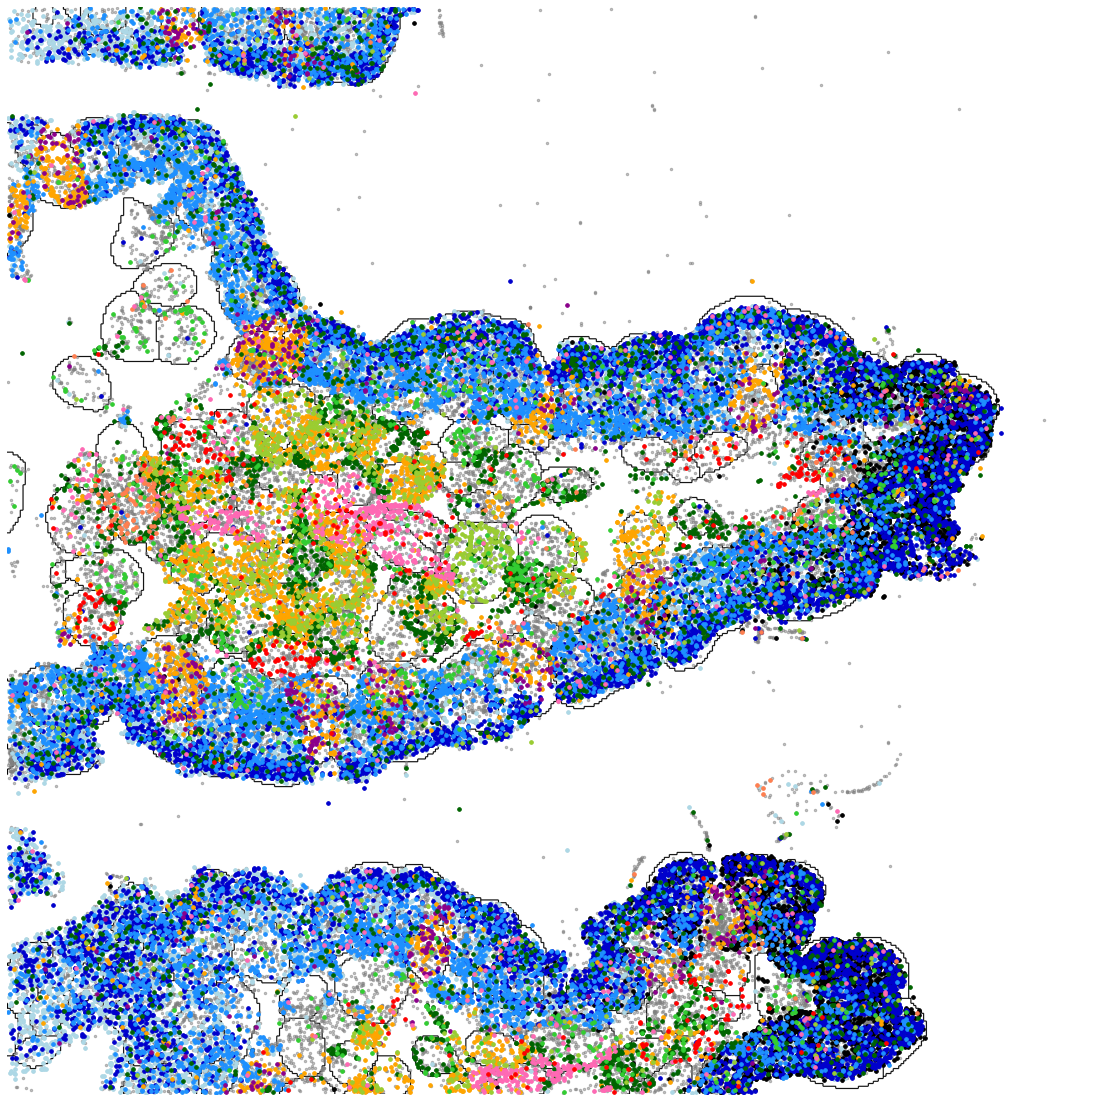

In [7]:
plt.figure(figsize=(20,20))
plt.scatter(results.y, results.x, color='gray', alpha=0.5, s=6)

# Enterocytes
plot_gene(results, 'Slc51a', colors['Slc51a'])
plot_gene(results, 'Ada', colors['Ada'])
plot_gene(results, 'Apob', colors['Apob'])
plot_gene(results, 'Slc5a1', colors['Slc5a1'])

# Endothelial + Goblet
plot_gene(results, 'Txndc5', colors['Txndc5'])

# Goblet
plot_gene(results, 'Klk1', colors['Klk1'])
plot_gene(results, 'Krt7', colors['Krt7'])

# Macrophage
plot_gene(results, 'C1qb', colors['C1qb'])
plot_gene(results, 'H2-Eb1', colors['H2-Eb1'])

# B cells
plot_gene(results, 'Ighd', colors['Ighd']) # Naive B-cell
plot_gene(results, 'Mzb1', colors['Mzb1']) # Plasma B-cell
plot_gene(results, 'Cd79a', colors['Cd79a']) # B-cell, general
plot_gene(results, 'Cd79b', colors['Cd79b']) # B-cell, general

# T cells
plot_gene(results, 'Cd4', colors['Cd4'])
plot_gene(results, 'Cd8a', colors['Cd8a'])

# Stem+TA
plot_gene(results, 'Mki67', colors['Mki67'])
plot_gene(results, 'Stmn1', colors['Stmn1'])

plot_gene(results, 'Acta2', colors['Acta2'])

# Endothelial
plot_gene(results, 'Nes', colors['Nes'])
plot_gene(results, 'Adgrf5', colors['Adgrf5'])
plot_gene(results, 'Scarb1', colors['Scarb1'])

plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray')

plt.xticks([])
plt.yticks([])

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

In [8]:
cell_id = 27
diff = 20
df_cell = pd.DataFrame(columns=results.columns)
for i in range(len(results)):
    x = results.loc[i,'x']+40
    y = results.loc[i,'y']+40
    if segmentation[x,y]==cell_id:
        df_cell.loc[len(df_cell)] = results.loc[i]
        
color_list = []
size_list = []
alpha_list = []
for i in range(len(df_cell)):
    name = df_cell.loc[i, 'predicted_name']
    if name in colors:
        color_list.append(colors[name])
        size_list.append(60)
        alpha_list.append(1)
    else:
        color_list.append('gray')
        size_list.append(40)
        alpha_list.append(0.5)
        
df_cell['colors'] = color_list
df_cell['sizes'] = size_list
df_cell['alphas'] = alpha_list

df_cell

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,13,14,15,16,17,18,19,colors,sizes,alphas
0,681,454,0,NaN,0.999999,119468,46,Net1,prediction,0.999173,...,0.000081,0.986606,0.004042,0.000523,0.000271,0.000407,0.688759,gray,40,0.5
1,672,456,0,NaN,1.0,114789,50,Slc5a1,prediction,0.000012,...,0.000198,0.000116,0.994986,0.066087,0.000056,0.000833,0.000232,dodgerblue,60,1.0
2,685,471,0,NaN,1.0,121491,92,Sdc1,prediction,0.000167,...,0.396181,0.000314,0.000081,0.021731,0.000142,0.998931,0.000609,gray,40,0.5
3,674,461,0,NaN,1.0,115899,1,Slc51a,prediction,0.000123,...,0.00009,0.016644,0.000416,0.081061,0.000065,0.00058,0.009885,lightblue,60,1.0
4,678,445,0,NaN,0.995669,118006,135,Lpar1,prediction,0.003686,...,0.00016,0.000127,0.000031,0.000198,0.000054,0.000434,0.000185,gray,40,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,608,470,8,NaN,0.955363,3811700,49,Neat1,prediction,0.000158,...,0.000347,0.00158,0.508615,0.797861,0.000103,0.00861,0.000986,gray,40,0.5
747,611,466,8,NaN,0.998308,3812497,5,Txndc5,prediction,0.000142,...,0.00177,0.198104,0.000095,0.022424,0.000243,0.000102,0.001058,orange,60,1.0
748,636,526,8,NaN,0.999228,3818997,46,Net1,prediction,0.370774,...,0.000077,0.155616,0.00015,0.000368,0.000181,0.000083,0.626305,gray,40,0.5
749,623,469,8,NaN,0.95505,3815612,49,Neat1,prediction,0.002371,...,0.00066,0.000084,0.008872,0.000133,0.000297,0.000081,0.000774,gray,40,0.5


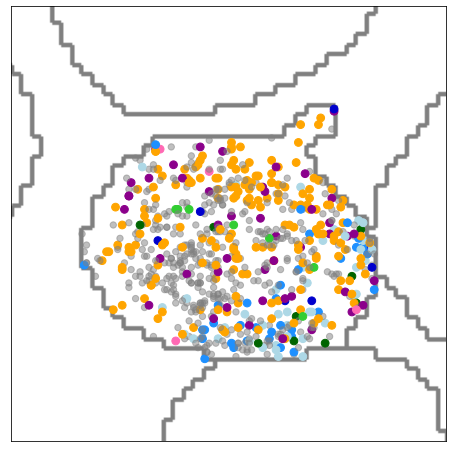

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(df_cell.y, df_cell.x, c=df_cell.colors, s=df_cell.sizes, alpha=df_cell.alphas)
plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray', vmin=-2)
plt.xlim([560-195,560])
plt.ylim([725,725-195])
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
cell_id = 37
diff = 20
df_cell = pd.DataFrame(columns=results.columns)
for i in range(len(results)):
    x = results.loc[i,'x']+40
    y = results.loc[i,'y']+40
    if segmentation[x,y]==cell_id:
        df_cell.loc[len(df_cell)] = results.loc[i]
        
color_list = []
size_list = []
alpha_list = []
for i in range(len(df_cell)):
    name = df_cell.loc[i, 'predicted_name']
    if name in colors:
        color_list.append(colors[name])
        size_list.append(60)
        alpha_list.append(1)
    else:
        color_list.append('gray')
        size_list.append(40)
        alpha_list.append(0.5)
        
df_cell['colors'] = color_list
df_cell['sizes'] = size_list
df_cell['alphas'] = alpha_list

df_cell

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,13,14,15,16,17,18,19,colors,sizes,alphas
0,650,1016,0,NaN,0.99999,101972,1,Slc51a,prediction,0.000013,...,0.000127,0.000191,0.008624,0.000154,0.004917,0.000164,0.000137,lightblue,60,1.0
1,760,1093,0,NaN,1.0,149667,49,Neat1,prediction,0.000103,...,0.000299,0.000092,0.963827,0.000264,0.0001,0.000058,0.000287,gray,40,0.5
2,703,1039,0,NaN,1.0,129335,1,Slc51a,prediction,0.000039,...,0.000111,0.000061,0.000079,0.000348,0.000023,0.000074,0.000416,lightblue,60,1.0
3,649,1080,0,NaN,0.999439,101470,2,Maoa,prediction,0.000256,...,0.001042,0.000471,0.000119,0.005863,0.584307,0.00201,0.959164,gray,40,0.5
4,649,1084,0,NaN,1.0,101474,45,Apob,prediction,0.005357,...,0.000363,0.000558,0.997901,0.10071,0.910923,0.000732,0.000838,mediumblue,60,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,697,1080,8,NaN,0.999883,3841884,49,Neat1,prediction,0.000487,...,0.016374,0.000173,0.161806,0.001296,0.000259,0.000206,0.030622,gray,40,0.5
1127,754,1061,8,NaN,0.999649,3864725,50,Slc5a1,prediction,0.000192,...,0.000164,0.000169,0.049652,0.002303,0.000078,0.000204,0.000394,dodgerblue,60,1.0
1128,647,1032,8,NaN,0.995312,3822508,92,Sdc1,prediction,0.000268,...,0.007292,0.000049,0.000031,0.00034,0.000072,0.199501,0.000024,gray,40,0.5
1129,637,1063,8,NaN,0.99726,3819512,45,Apob,prediction,0.025972,...,0.000743,0.000953,0.037334,0.014487,0.092098,0.000056,0.000162,mediumblue,60,1.0


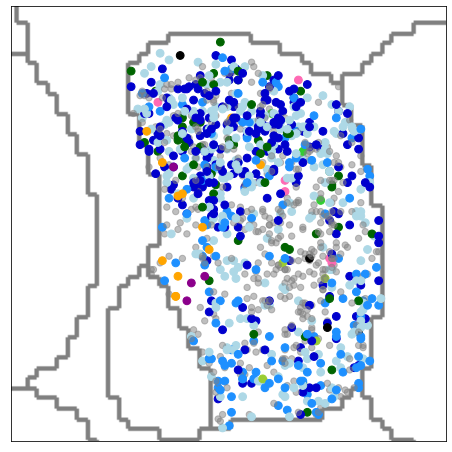

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(df_cell.y, df_cell.x, c=df_cell.colors, s=df_cell.sizes, alpha=df_cell.alphas)
plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray', vmin=-2)
plt.xlim([1140-195,1140])
plt.ylim([780,780-195])
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
cell_id = 88
diff = 20
df_cell = pd.DataFrame(columns=results.columns)
for i in range(len(results)):
    x = results.loc[i,'x']+40
    y = results.loc[i,'y']+40
    if segmentation[x,y]==cell_id:
        df_cell.loc[len(df_cell)] = results.loc[i]
        
color_list = []
size_list = []
alpha_list = []
for i in range(len(df_cell)):
    name = df_cell.loc[i, 'predicted_name']
    if name in colors:
        color_list.append(colors[name])
        size_list.append(60)
        alpha_list.append(1)
    else:
        color_list.append('gray')
        size_list.append(40)
        alpha_list.append(0.5)
        
df_cell['colors'] = color_list
df_cell['sizes'] = size_list
df_cell['alphas'] = alpha_list

df_cell

,x,y,batch_id,cell_id,probability,spot_index,predicted_id,predicted_name,source,0,...,13,14,15,16,17,18,19,colors,sizes,alphas
0,1022,802,0,NaN,0.999992,227497,129,Ffar3,prediction,1.0,...,0.000031,0.000057,0.142941,0.999887,0.000112,0.478419,0.000562,gray,40,0.5
1,1027,803,0,NaN,0.996476,229718,59,Acta2,prediction,1.0,...,0.000383,0.000251,0.000285,0.998831,0.00008,0.049853,0.000115,hotpink,60,1.0
2,976,842,0,NaN,1.0,210929,111,Il7r,prediction,0.000077,...,0.000101,0.000102,0.000056,0.999473,0.000066,0.000086,0.000236,gray,40,0.5
3,1018,797,0,NaN,1.0,225690,59,Acta2,prediction,0.999656,...,0.000087,0.000113,0.057642,0.994129,0.000069,0.000376,0.000062,hotpink,60,1.0
4,985,873,0,NaN,1.0,214013,156,S1pr1,prediction,0.000087,...,0.000011,0.821578,0.000313,0.000104,0.000234,0.000506,0.000291,gray,40,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1074,844,8,NaN,0.999439,3957994,49,Neat1,prediction,0.000058,...,0.000288,0.000346,0.044771,0.000198,0.000111,0.000182,0.000157,gray,40,0.5
583,1021,878,8,NaN,0.991374,3942494,89,Cd79b,prediction,0.00006,...,0.000076,0.000533,0.016945,0.002414,0.000068,0.468921,0.000089,yellowgreen,60,1.0
584,958,811,8,NaN,0.960485,3924824,46,Net1,prediction,0.228797,...,0.000091,0.018793,0.000533,0.000021,0.000097,0.00041,0.613757,gray,40,0.5
585,1032,914,8,NaN,0.984528,3945785,5,Txndc5,prediction,0.000058,...,0.00006,0.040164,0.000225,0.061457,0.000574,0.000491,0.000015,orange,60,1.0


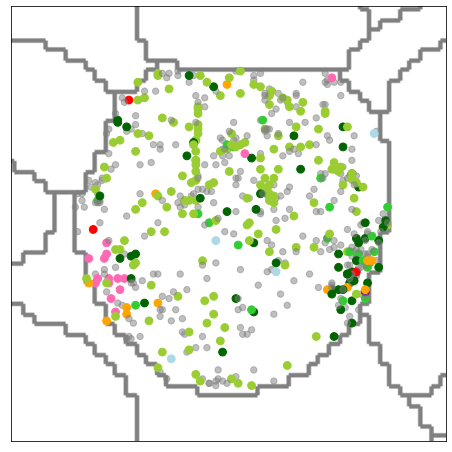

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(df_cell.y, df_cell.x, c=df_cell.colors, s=df_cell.sizes, alpha=df_cell.alphas)
plt.imshow(cell_bounds[40:-40,40:-40]*-1, cmap='gray', vmin=-2)
plt.xlim([950-195,950])
plt.ylim([1100,1100-195])
plt.xticks([])
plt.yticks([])
plt.show()